# Actividad 2. Análisis de estilo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://get.pxhere.com/photo/analysis-laptop-business-style-cartoon-graph-chart-technology-finance-monitor-screen-market-concept-financial-data-office-internet-money-report-growth-pc-statistic-symbol-display-analytics-yellow-text-product-font-line-human-behavior-communication-area-graphic-design-brand-logo-illustration-graphics-clip-art-icon-1449661.jpg" width="400px" height="400px" />

**Resumen.**
> En esta actividad, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en la clase anterior. Específicamente, utilizarás técnicas de regresión lineal para analizar el estilo de un portafolio de tu elección que tenga datos públicos, y evaluar qué tan bueno es el administrador de dicho portafolio.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Actividad2_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Actividad2_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Elección de portafolio (20 puntos)

1. Elija un fondo de inversión. **Especifique un enlace referente a este fondo, y un enlace donde pueda descargar los datos**. Descargue los precios diarios ajustados en el cierre de su portafolio bien sea usando pandas datareader, o desde un csv usando pandas. Obtenga los rendimientos porcentuales diarios. (10 puntos)

### [¿Qué es BlackRock?](https://www.milenio.com/negocios/quien-es-blackrock-el-fondo-de-inversion-mas-grande-del-mundo)

### [Enlace a BlackRock](https://www.blackrock.com)

### [Descargar datos](https://finance.yahoo.com/quote/BLK?p=BLK&.tsrc=fin-srch)

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

C:\Users\aleja\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
# BlachRock
tickers = ['BLK']
start_date ='2015-07-09'

In [4]:
closes = get_adj_closes(tickers,start_date)

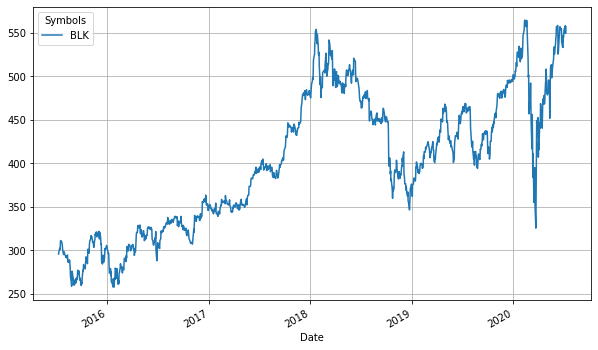

In [5]:
closes.plot(figsize=(10,6), grid=True)

In [6]:
#Rendimientos porncentuales diarios
ret=pd.DataFrame(closes.pct_change().dropna())
ret.head(5)

Symbols,BLK
Date,
2015-07-10,0.007629
2015-07-13,0.014140
2015-07-14,-0.004444
2015-07-15,0.010971
2015-07-16,0.022482


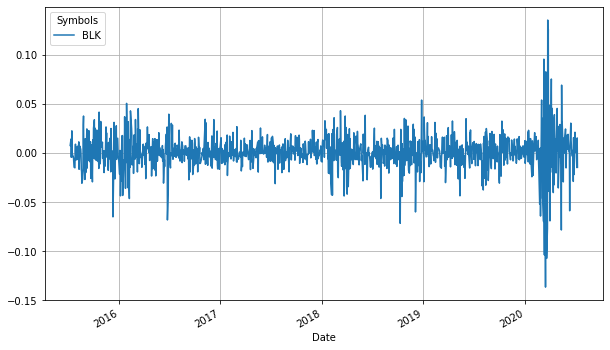

In [7]:
ret.plot(figsize=(10,6), grid=True)

2. Seleccione **claramente** los estilos de inversión a los que les va a atribuir el comportamiento del portafolio. Descargue los precios diarios ajustados en el cierre de los índices que representan dichos estulos, y obtenga los rendimientos porcentuales diarios. (10 puntos)

Para ello usaremos las esquinas RUSSELL:

- Russell 1000 Growth (^RLG)
- Russell 1000 Value (^RLV)
- Russell 2000 Growth (^RUO)
- Russell 2000 Value (^RUJ)

In [8]:
tickers = ['^RLG','^RLV','^RUO','^RUJ']
start_date ='2015-07-09'

In [9]:
close = get_adj_closes(tickers,start_date)
close.head(5)

Symbols,^RLG,^RLV,^RUO,^RUJ
Date,,,,
2015-07-09,987.820007,1001.309998,770.380005,1496.140015
2015-07-10,1002.090027,1011.169983,783.450012,1514.010010
2015-07-13,1014.609985,1020.419983,794.219971,1525.329956
2015-07-14,1019.380005,1025.099976,800.000000,1533.430054
2015-07-15,1018.539978,1023.190002,794.330017,1523.079956


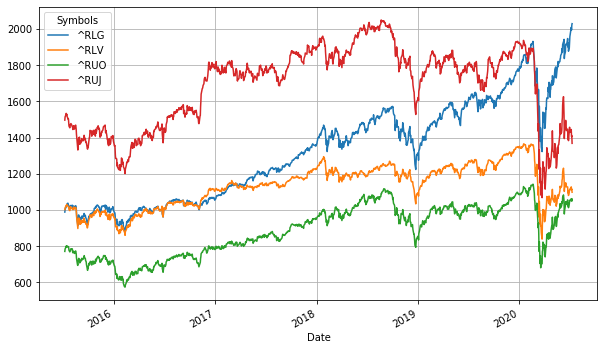

In [10]:
close.plot(figsize=(10,6), grid=True)

In [11]:
#Rendimientos porncentuales diarios
ret1=pd.DataFrame(close.pct_change().dropna())
ret1.head(5)

Symbols,^RLG,^RLV,^RUO,^RUJ
Date,,,,
2015-07-10,0.014446,0.009847,0.016966,0.011944
2015-07-13,0.012494,0.009148,0.013747,0.007477
2015-07-14,0.004701,0.004586,0.007278,0.005310
2015-07-15,-0.000824,-0.001863,-0.007087,-0.006750
2015-07-16,0.008944,0.006216,0.009392,0.003690


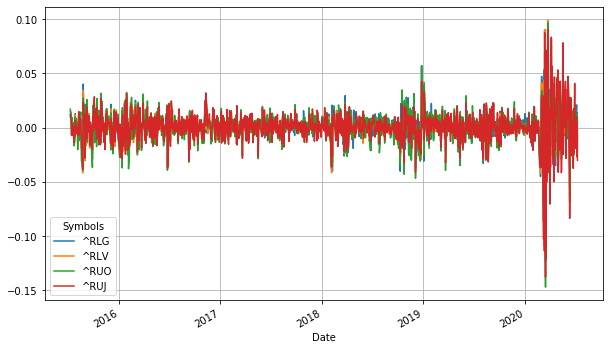

In [12]:
ret1.plot(figsize=(10,6), grid=True)

## 2. Regresión lineal (30 puntos)

Usando los datos del punto anterior:

1. Ajuste una regresión lineal de los rendimientos del portafolio como variable dependiente, respecto a los rendimientos de los índices seleccionados como variables explicativas (20 puntos).


In [13]:
# Importamos la librería optimize de scipy
from scipy.optimize import minimize
# Función a minimizar (residuales)
def sq_res(beta,rp,I):
    #beta[0] es lo que conocemos como alpha
    return ((rp-beta[0] -I.dot(beta[1:]))**2).sum()

In [17]:
close['BLK'] = closes['BLK']
close.head(5)


Symbols,^RLG,^RLV,^RUO,^RUJ,BLK
Date,,,,,
2015-07-09,987.820007,1001.309998,770.380005,1496.140015,295.490631
2015-07-10,1002.090027,1011.169983,783.450012,1514.010010,297.744781
2015-07-13,1014.609985,1020.419983,794.219971,1525.329956,301.954865
2015-07-14,1019.380005,1025.099976,800.000000,1533.430054,300.612885
2015-07-15,1018.539978,1023.190002,794.330017,1523.079956,303.910889


In [18]:
#Rendimientos porncentuales diarios
ret2=pd.DataFrame(close.pct_change().dropna())
ret2.head(5)

Symbols,^RLG,^RLV,^RUO,^RUJ,BLK
Date,,,,,
2015-07-10,0.014446,0.009847,0.016966,0.011944,0.007629
2015-07-13,0.012494,0.009148,0.013747,0.007477,0.014140
2015-07-14,0.004701,0.004586,0.007278,0.005310,-0.004444
2015-07-15,-0.000824,-0.001863,-0.007087,-0.006750,0.010971
2015-07-16,0.008944,0.006216,0.009392,0.003690,0.022482


In [50]:
# Datos
beta0= np.ones(5)/5
rp=ret2.iloc[:,0].values
I=ret2.iloc[:,1:].values


In [51]:
# Restricciones
cons={'type':'eq','fun': lambda beta: beta[1:].sum()-1}
bnds=((None,None),)+((0,None),)*4
bnds

((None, None), (0, None), (0, None), (0, None), (0, None))

In [52]:
# Resolvemos
resultado= minimize(fun=sq_res,
                   x0=beta0,
                   args=(rp,I),
                   bounds=bnds,
                   constraints=cons
                   )

In [53]:
resultado

     fun: 0.028917132132067317
     jac: array([6.07687980e-08, 4.11530775e-02, 4.10618449e-02, 8.04999440e-02,
       4.10740254e-02])
 message: 'Optimization terminated successfully.'
    nfev: 88
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([4.20791392e-04, 6.55451377e-01, 3.18453156e-01, 3.18871906e-17,
       2.60954669e-02])

In [54]:
resultado.x[1:].sum()

0.9999999999999999

In [55]:
alpha=resultado.x[0]
alpha

0.0004207913924052808

In [56]:
b1,b2,b3,b4=resultado.x[1:]
b1,b2,b3,b4

(0.6554513772887659,
 0.318453155810459,
 3.188719057409858e-17,
 0.02609546690077505)

2. ¿Qué porcentaje de variabilidad de los rendimientos puede explicar con los índices propuestos $R^2$? (10 puntos)

In [57]:
# Calculamos residuales (error)
error=rp - alpha -b1*I[:,0] -b2* I[:,1]-b3*I[:,2]-b4*I[:,3]

In [58]:
# Calculamos Rsq
R2=1-np.var(error)/np.var(rp)
R2

0.8565734656201782

In [59]:
# 
print(("El procentaje explicable es ") + (f'{R2*100}%'))

El procentaje explicable es 85.65734656201782%


## 3. Análisis de estilo (30 puntos)

De acuerdo a lo obtenido en su análisis de regresión:

1. ¿Cuánto porcentaje del comportamiento del portafolio se le atribuye a cada estilo? (15 puntos)


In [72]:
print("El fondo Blackrock esta conformado en un: ")
print( (f'{b1*100}% ') + ("por activos de alta capialización y con alta diferencia BM (Russell 1000 Growth)"))
print( (f'{b2*100}% ')+ ("por activos de alta capitalización con baja diferencia BM (Russell 1000 Value);"))
print( (f'{b3*100}% ') + ("por activos de baja capitalización con alta diferencia BM (Russell 2000 Growth)"))
print( (f'{b4*100}% ') + ("por activos de baja capitalización con baja diferencia BM"))

El fondo Blackrock esta conformado en un: 
65.5451377288766% por activos de alta capialización y con alta diferencia BM (Russell 1000 Growth)
31.845315581045902% por activos de alta capitalización con baja diferencia BM (Russell 1000 Value);
3.1887190574098577e-15% por activos de baja capitalización con alta diferencia BM (Russell 2000 Growth)
2.609546690077505% por activos de baja capitalización con baja diferencia BM


2. ¿Cuánto sería justo ceder de los rendimientos diarios al administrador del portafolio por la selección individual de activos?. (5 puntos)


In [73]:
# alpha
alpha

0.0004207913924052808

3. ¿Cuál es el estilo predominante?, ¿coincide con lo que promete el portafolio? (10 puntos)

Por mucho es el estilo de alta capitalización, pues abarca más del 90%. Coincide claramente con lo que el portafolio promete.

## 4. Replica del portafolios (20 puntos)

1. Graficar los últimos cien días de los rendimientos de su portafolio junto a los rendimientos que se habrían obtenido en una inversión pasiva en los índices, con los pesos obtenidos en la regresión lineal: (20 puntos)
 - ¿Qué tan cercanas están las gráficas? 
 - ¿Podría reemplazar la inversión pasiva al portafolio analizado?

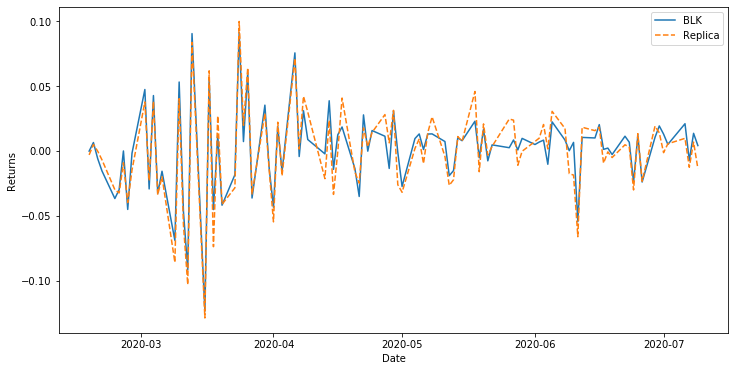

In [75]:
# Graficar los rendimientos del portafolio y los que se obtendrían con los índices
plt.figure(figsize=(12,6))
plt.plot(ret2.index[-100:],rp[-100:], label='BLK')
plt.plot(ret2.index[-100:],(alpha +b1*I[:,0] +b2* I[:,1]+b3*I[:,2]+b4*I[:,3])[-100:],'--',label='Replica')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc='best')

Las gráficas se encuentran muy cercanas, si bien no le sigue con exactitud sigue la mayor parte de las "trends". Personalmente no creo que le pueda remplazar del todo ya que en ciertos puntos las diferencias pueden llegar a significar una cantidad considerable de dinero. Algo que no se puede apreciar visualmente en la pequeña gráfica.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>